### Importação de Bibliotecas 

###### Realiza a importação de bibliotecas necessárias para o desenvolvimento dos testes do modelo PLN de tagueamento.

In [1]:
import re
import pickle
import nltk
from PyPDF2 import PdfReader
from PyPDF2.errors import PdfReadError  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import unittest
import os
import time
import matplotlib.pyplot as plt


nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Extração do Texto do PDF

###### Realiza a extração do texto do PDF do arquivo de normas da CVM.

In [2]:
# Função para extrair texto de um PDF
def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = ''
    for page in reader.pages:
        text += page.extract_text()
    return text

### Pré-processamento do texto 

###### Realiza o pré-processamento do texto do arquivo PDF da CVM, removendo caracteres especiais, espaços em branco e quebras de linha.

In [3]:
# Função para preprocessar o texto
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('portuguese')]
    return ' '.join(tokens)


### Carregamento do modelo

###### Realiza o carregamento do modelo de PLN de tagueamento.

In [14]:

def carrega_modelo():
    
    # Caminhos dos arquivos
    model_path = '../model/model.pkl'
    vectorizer_path = '../model/vectorizer.pkl'
    mbl_path = '../model/mlb.pkl'

    # Verifica se os arquivos existem
    if not os.path.exists(model_path):
        raise FileNotFoundError(f'File {model_path} not found')

    if not os.path.exists(vectorizer_path):
        raise FileNotFoundError(f'File {vectorizer_path} not found')

    if not os.path.exists(mbl_path):
        raise FileNotFoundError(f'File {mbl_path} not found')


    # Carrega o modelo, vetorizador e classes
    with open(model_path, 'rb') as model_file:
        model = pickle.load(model_file)

    with open(vectorizer_path, 'rb') as vectorizer_file:
        vectorizer = pickle.load(vectorizer_file)

    with open(mbl_path, 'rb') as mlb_file:
        mlb_classes = pickle.load(mlb_file)

    return model, vectorizer, mlb_classes

### Configuração do Unittest

###### Realiza a configuração do Unittest para execução dos testes do modelo de PLN de tagueamento.

In [23]:
# Função para configurar o TestRunner para um teste específico
def run_specific_test(clase_teste, nome_teste=None):
  loader = unittest.TestLoader()
  if nome_teste:
    # Carregar teste específico
    suite = loader.loadTestsFromName(f'{clase_teste.__name__}.{nome_teste}', clase_teste)
  else:
    # Carregar todos os testes da classe
    suite = loader.loadTestsFromTestCase(clase_teste)

  runner = unittest.TextTestRunner(verbosity=2)
  runner.run(suite)


### Teste 1 - Extração de Texto de PDF

In [24]:
class TesteExtracaoDeTextoPDF(unittest.TestCase):

    # Configuração inicial
    def setUp(self):
        self.pdf_path = r"C:\Users\Inteli\Downloads\oc-sep-0522.pdf"
        self.expected_text = """COMISSÃO DE VALORES MOBILIÁRIOS Rua Sete de Setembro, 111/2-5º e 23-34º Andares, Centro, Rio de Janeiro/RJ – CEP: 20050-901 – Brasil - Tel.: (21) 3554-8686 Rua Cincinato Braga, 340/2º, 3º e 4º Andares, Bela Vista, São Paulo/ SP – CEP: 01333-010 – Brasil - Tel.: (11) 2146- 2000 SCN Q.02 – Bl. A – Ed. Corporate Financial Center, S.404/4º Andar, Brasília/DF – CEP: 70712-900 – Brasil -Tel.: (61) 3327-2030/2031 www.cvm.gov.br Ofício Circular nº 5/2022-CVM/SEP Rio de Janeiro, 23 de novembro 2022. Assunto: Relato Integrado - Resolução CVM n° 14/20. Senhor Diretor de Relações com Investidores/Representante Legal, 1 . O presente Ofício Circular tem como objetivo informar às companhias abertas e estrangeiras sobre a criação de uma categoria especíﬁca no Sistema Empresas.NET (E-NET) para envio do Relato Integrado previsto na Resolução CVM n° 14/20. 2 . A Resolução CVM n° 14/20 tornou obrigatória para as companhias abertas, quando da decisão de elaboração e divulgação do Relato Integrado, a Orientação CPC 09 – Relato Integrado, emitida pelo Comitê de Pronunciamentos Contábeis - CPC (Correlação à Estrutura Conceitual Básica do Relato Integrado, elaborada pelo Internacional Integrated Reporting Council - IIRC) e determinou que o Relato Integrado deve ser objeto de asseguração limitada por auditor independente registrado na CVM. 3 . As Companhias vêm utilizando outras categorias já existentes no E-NET para envio do Relato Integrado, como, por exemplo, a categoria "Relatório de Sustentabilidade". 4 . A partir desta data, o Relato Integrado previsto na referida Resolução deverá ser encaminhado por meio da categoria “Relato Integrado”. 5 . Por sua vez, outros relatórios ou documentos especíﬁcos relacionados às questões ASG, podem continuar a ser divulgados como anteriormente. 6 . Importa salientar, ainda, que, no âmbito do Relato Integrado, a companhia deve deixar claro ao usuário da informação (i) que o documento segue a estrutura conceitual prevista na Orientação CPC 09 e (ii) que isso está compreendido no escopo dos trabalhos de asseguração limitada pelo auditor independente registrado na CVM. 7 . Informamos que dúvidas referentes à instalação, utilização e Ofício-Circular 5 (1651789) SEI 19957.014264/2022-93 / pg. 1funcionamento do Sistema Empresas.NET, assim como o relato de problemas ou diﬁculdades no envio de documentos, devem ser encaminhadas para a Superintendência de Emissores da B3. 8 . O contato com a Superintendência de Emissores pode ser feito pelo telefone (11) 2565-5063 ou por e-mail: emissores.empresas@b3.com.br: a ) Atendimento Normal: nos dias úteis, das 8h às 20h, pelo e-mail ou pelo telefone. b ) Plantão de Atendimento: nos dias úteis, após às 20h ou em finais de semana e feriados, exclusivamente por meio do e-mail. 9 . As questões recebidas após às 20h dos dias úteis e em ﬁnais de semana e feriados serão tratadas após às 8h do dia útil seguinte, exceto as relacionadas à disponibilidade do sistema para o recebimento de informações, as quais serão tratadas imediatamente. Atenciosamente, FERNANDO SOARES VIEIRA Superintendente de Relações com Empresas Documento assinado eletronicamente por Fernando Soares Vieira , Superintendente , em 23/11/2022, às 12:37, com fundamento no art. 6º do Decreto nº 8.539, de 8 de outubro de 2015. A autenticidade do documento pode ser conferida no site https://super.cvm.gov.br/conferir_autenticidade , informando o código verificador 1651789 e o código CRC AAF68AC0 . This document's authenticity can be verified by accessing https://super.cvm.gov.br/conferir_autenticidade , and typing the "Código Verificador" 1651789 and the "Código CRC" AAF68AC0 . Referência: Processo nº 19957.014264/2022-93 Documento SEI nº 1651789 Ofício-Circular 5 (1651789) SEI 19957.014264/2022-93 / pg. 2"""
        self.maxDiff = None

    # Função para formatar o texto esperado pelo teste
    def formatar_texto(self, texto):
        texto = re.sub(r'\s+', ' ', texto).strip()  
        return texto

    # Teste para verificar se o texto extraído do PDF corresponde ao esperado
    def teste_extracao_texto_pdf(self):
        try:
            texto_extraido = extract_text_from_pdf(self.pdf_path)
            texto_formatado = self.formatar_texto(texto_extraido)
            texto_esperado_formatado = self.formatar_texto(self.expected_text)

            self.assertEqual(texto_formatado, texto_esperado_formatado, "O texto extraído não corresponde ao esperado.")
        except FileNotFoundError:
            self.fail(f"Arquivo PDF não encontrado: {self.pdf_path}")
        except Exception as e:
            self.fail(f"Erro inesperado durante o teste: {str(e)}")

run_specific_test(TesteExtracaoDeTextoPDF)


teste_extracao_texto_pdf (__main__.TesteExtracaoDeTextoPDF.teste_extracao_texto_pdf) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.128s

OK


### Teste 2 - Extração de um PDF Inválido

In [25]:
class TesteExtracaoDeTextoPDF(unittest.TestCase):

    # Configuração inicial
    def setUp(self):
        self.invalid_pdf_path = r"C:\Users\Inteli\Downloads\pdf_corrompido.pdf"

    # Função para testar o comportamento ao extrair texto de um PDF inválido
    def teste_extracao_texto_pdf_invalido(self):
        try:
            texto_extraido = extract_text_from_pdf(self.invalid_pdf_path)

            # Se a função não gerar exceção e retornar None, o teste deve passar
            self.assertIsNone(texto_extraido, "A função deve retornar None para um PDF corrompido ou ilegível.")
        except PdfReadError:

            # Se a função gerar uma exceção específica de PDF inválido, o teste deve passar
            pass
        except Exception as e:
            self.fail(f"A função gerou uma exceção inesperada: {e}")

run_specific_test(TesteExtracaoDeTextoPDF)

teste_extracao_texto_pdf_invalido (__main__.TesteExtracaoDeTextoPDF.teste_extracao_texto_pdf_invalido) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


### Teste 3 - Pré-processamento do Texto

In [26]:
class TestePreProcessamentoDeTexto(unittest.TestCase):

  # Configuração inicial
  def setUp(self):
    self.texto_sem_formatacao = """COMISSÃO DE VALORES MOBILIÁRIOS Rua Sete de Setembro, 111/2-5º e 23-34º Andares, Centro, Rio de Janeiro/RJ – CEP: 20050-901 – Brasil - Tel.: (21) 3554-8686 Rua Cincinato Braga, 340/2º, 3º e 4º Andares, Bela Vista, São Paulo/ SP – CEP: 01333-010 – Brasil - Tel.: (11) 2146- 2000 SCN Q.02 – Bl. A – Ed. Corporate Financial Center, S.404/4º Andar, Brasília/DF – CEP: 70712-900 – Brasil -Tel.: (61) 3327-2030/2031 www.cvm.gov.br Ofício Circular nº 5/2022-CVM/SEP Rio de Janeiro, 23 de novembro 2022. Assunto: Relato Integrado - Resolução CVM n° 14/20. Senhor Diretor de Relações com Investidores/Representante Legal, 1 . O presente Ofício Circular tem como objetivo informar às companhias abertas e estrangeiras sobre a criação de uma categoria especíﬁca no Sistema Empresas.NET (E-NET) para envio do Relato Integrado previsto na Resolução CVM n° 14/20. 2 . A Resolução CVM n° 14/20 tornou obrigatória para as companhias abertas, quando da decisão de elaboração e divulgação do Relato Integrado, a Orientação CPC 09 – Relato Integrado, emitida pelo Comitê de Pronunciamentos Contábeis - CPC (Correlação à Estrutura Conceitual Básica do Relato Integrado, elaborada pelo Internacional Integrated Reporting Council - IIRC) e determinou que o Relato Integrado deve ser objeto de asseguração limitada por auditor independente registrado na CVM. 3 . As Companhias vêm utilizando outras categorias já existentes no E-NET para envio do Relato Integrado, como, por exemplo, a categoria "Relatório de Sustentabilidade". 4 ."""
    self.texto_esperado = "comissão valores mobiliários rua sete setembro 11125º 2334º andares centro rio janeirorj cep 20050901 brasil tel 21 35548686 rua cincinato braga 3402º 3º 4º andares bela vista paulo sp cep 01333010 brasil tel 11 2146 2000 scn q02 bl ed corporate financial center s4044º andar brasíliadf cep 70712900 brasil tel 61 332720302031 wwwcvmgovbr ofício circular nº 52022cvmsep rio janeiro 23 novembro 2022 assunto relato integrado resolução cvm n 1420 senhor diretor relações investidoresrepresentante legal 1 presente ofício circular objetivo informar companhias abertas estrangeiras sobre criação categoria especíﬁca sistema empresasnet enet envio relato integrado previsto resolução cvm n 1420 2 resolução cvm n 1420 tornou obrigatória companhias abertas decisão elaboração divulgação relato integrado orientação cpc 09 relato integrado emitida comitê pronunciamentos contábeis cpc correlação estrutura conceitual básica relato integrado elaborada internacional integrated reporting council iirc determinou relato integrado deve objeto asseguração limitada auditor independente registrado cvm 3 companhias vêm utilizando outras categorias existentes enet envio relato integrado exemplo categoria relatório sustentabilidade 4"
    self.maxDiff = None

  # Teste para verificar se o texto extraído do PDF corresponde ao esperado
  def teste_preprocessamento_texto(self):
    try:
      texto_processado = preprocess_text(self.texto_sem_formatacao)

      # Verifica se o texto processado corresponde ao esperado
      self.assertEqual(texto_processado, self.texto_esperado, "O texto processado não corresponde ao esperado.")

      # Demonstra o texto processado e o esperado
      print(f"Texto processado: {texto_processado}")
      print(f"Texto esperado: {self.texto_esperado}")

    except Exception as e:
      self.fail(f"Erro inesperado durante o teste: {str(e)}")

run_specific_test(TestePreProcessamentoDeTexto)


teste_preprocessamento_texto (__main__.TestePreProcessamentoDeTexto.teste_preprocessamento_texto) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.111s

OK


Texto processado: comissão valores mobiliários rua sete setembro 11125º 2334º andares centro rio janeirorj cep 20050901 brasil tel 21 35548686 rua cincinato braga 3402º 3º 4º andares bela vista paulo sp cep 01333010 brasil tel 11 2146 2000 scn q02 bl ed corporate financial center s4044º andar brasíliadf cep 70712900 brasil tel 61 332720302031 wwwcvmgovbr ofício circular nº 52022cvmsep rio janeiro 23 novembro 2022 assunto relato integrado resolução cvm n 1420 senhor diretor relações investidoresrepresentante legal 1 presente ofício circular objetivo informar companhias abertas estrangeiras sobre criação categoria especíﬁca sistema empresasnet enet envio relato integrado previsto resolução cvm n 1420 2 resolução cvm n 1420 tornou obrigatória companhias abertas decisão elaboração divulgação relato integrado orientação cpc 09 relato integrado emitida comitê pronunciamentos contábeis cpc correlação estrutura conceitual básica relato integrado elaborada internacional integrated reporting cou

### Teste 4 - Vetorização do Texto

In [27]:
class TesteVetorizacaoTextoModeloCarregado(unittest.TestCase):

    # Configuração inicial
    def setUp(self):
        try:
            # Carregar o vetor TF-IDF, a partir do modelo salvo
            self.vectorizer = carrega_modelo()[1]
            
            self.processed_text = "comissão valores mobiliários rua sete setembro 11125º 2334º andares centro rio janeirorj cep 20050901 brasil tel 21 35548686 rua cincinato braga 3402º 3º 4º andares bela vista paulo sp cep 01333010 brasil tel 11 2146 2000 scn q02 bl ed corporate financial center s4044º andar brasíliadf cep 70712900 brasil tel 61 332720302031 wwwcvmgovbr ofício circular nº 52022cvmsep rio janeiro 23 novembro 2022 assunto relato integrado resolução cvm n 1420 senhor diretor relações investidoresrepresentante legal 1 presente ofício circular objetivo informar companhias abertas estrangeiras sobre criação categoria especíﬁca sistema empresasnet enet envio relato integrado previsto resolução cvm n 1420 2 resolução cvm n 1420 tornou obrigatória companhias abertas decisão elaboração divulgação relato integrado orientação cpc 09 relato integrado emitida comitê pronunciamentos contábeis cpc correlação estrutura conceitual básica relato integrado elaborada internacional integrated reporting council iirc determinou relato integrado deve objeto asseguração limitada auditor independente registrado cvm 3 companhias vêm utilizando outras categorias existentes enet envio relato integrado exemplo categoria relatório sustentabilidade 4"
        except FileNotFoundError:
            self.fail("Arquivo vectorizer.pkl não encontrado.")
        except Exception as e:
            self.fail(f"Erro ao carregar o modelo: {str(e)}")

    # Teste para verificar a vetorização do texto
    def teste_vetorizacao_texto(self):
        try:
            X_new = self.vectorizer.transform([self.processed_text])

            # Demonstra o vetor TF-IDF gerado
            print(X_new)

            # Verifica se o vetor gerado não está vazio
            self.assertGreater(X_new.nnz, 0, "O vetor TF-IDF gerado está vazio, mas não deveria.")
        except Exception as e:
            self.fail(f"Erro durante a vetorização do texto: {str(e)}")

run_specific_test(TesteVetorizacaoTextoModeloCarregado)


teste_vetorizacao_texto (__main__.TesteVetorizacaoTextoModeloCarregado.teste_vetorizacao_texto) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.023s

OK


  (0, 14158)	0.0288215545803746
  (0, 14145)	0.06675408215581298
  (0, 14082)	0.027264960447531565
  (0, 13891)	0.021971976269815407
  (0, 13854)	0.07932903259309272
  (0, 13542)	0.09025749913463893
  (0, 13377)	0.065042701784314
  (0, 13288)	0.07542849405210107
  (0, 13001)	0.029644491887052985
  (0, 12929)	0.027643620458171377
  (0, 12891)	0.03139188980052903
  (0, 12806)	0.021680900594771332
  (0, 12805)	0.021680900594771332
  (0, 12738)	0.045770483887025336
  (0, 12645)	0.029644491887052985
  (0, 12596)	0.029644491887052985
  (0, 12577)	0.043361801189542665
  (0, 12457)	0.043361801189542665
  (0, 12224)	0.07336557961546043
  (0, 12126)	0.09025749913463893
  (0, 12031)	0.04763198197546234
  (0, 12025)	0.05444489578331342
  (0, 12020)	0.42419642278694236
  (0, 11917)	0.05314790886587893
  (0, 11468)	0.029644491887052985
  :	:
  (0, 2914)	0.0605994889695632
  (0, 2759)	0.02478688561823769
  (0, 2689)	0.07932903259309272
  (0, 2352)	0.043361801189542665
  (0, 2351)	0.029644491887052985

### Teste 5 - Previsão de Tags 

teste_previsao_tags (__main__.TestePrevisaoTagsModeloCarregado.teste_previsao_tags) ... 

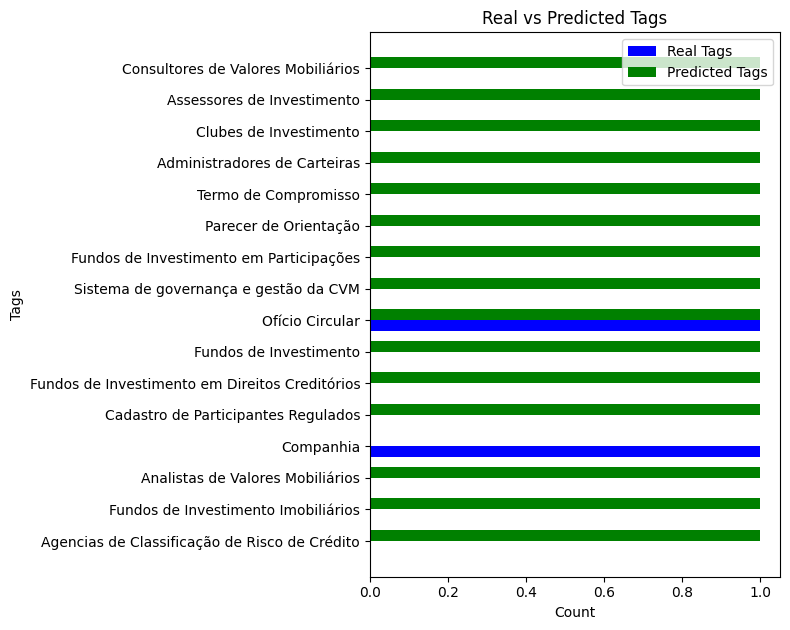

ok

----------------------------------------------------------------------
Ran 1 test in 0.669s

OK


In [28]:
class TestePrevisaoTagsModeloCarregado(unittest.TestCase):

    # Configuração inicial
    def setUp(self):
        try:
            self.pdf_path = r"C:\Users\Inteli\Downloads\oc-sep-0522.pdf"

            # Carregar o modelo, o vetor TF-IDF e o binarizador de tags
            self.model, self.vectorizer, self.mlb_classes = carrega_modelo()

            # Tags reais associadas ao documento
            self.real_tags = ["Companhia", "Ofício Circular"]

        except FileNotFoundError as e:
            self.fail(f"Arquivo necessário não encontrado: {e.filename}")
        except Exception as e:
            self.fail(f"Erro ao carregar arquivos: {str(e)}")

    # Teste para verificar a previsão de tags
    def teste_previsao_tags(self):
        try:
            raw_text = extract_text_from_pdf(self.pdf_path)
            processed_text = preprocess_text(raw_text)

            # Vetorizar o texto
            X_new = self.vectorizer.transform([processed_text])

            # Fazer a predição
            y_pred = self.model.predict(X_new)

            # Converter a predição em tags
            predicted_tags = [self.mlb_classes[i] for i in range(len(self.mlb_classes)) if y_pred[0, i] == 1]

            # Verifica se há pelo menos uma tag real nas tags previstas
            tags_reais_presentes = set(predicted_tags).intersection(set(self.real_tags))
            self.assertGreater(len(tags_reais_presentes), 0, "Nenhuma das tags reais foi encontrada nas tags previstas pelo modelo.")

            # Gerar o gráfico de comparação de tags reais e previstas
            self.plot_tag_comparison(self.real_tags, predicted_tags)

        except FileNotFoundError:
            self.fail(f"Arquivo PDF não encontrado: {self.pdf_path}")
        except Exception as e:
            self.fail(f"Erro durante o teste de previsão de tags: {str(e)}")

    # Função para plotar o gráfico de comparação de tags reais e previstas
    def plot_tag_comparison(self, real_tags, predicted_tags):
        try:
            # Preparar dados para o gráfico
            all_tags = list(set(real_tags + predicted_tags))
            real_count = [1 if tag in real_tags else 0 for tag in all_tags]
            predicted_count = [1 if tag in predicted_tags else 0 for tag in all_tags]

            # Criar gráfico de barras horizontais
            fig, ax = plt.subplots(figsize=(8, len(all_tags) * 0.4)) 
            bar_width = 0.35
            index = range(len(all_tags))

            ax.barh(index, real_count, bar_width, label='Real Tags', color='blue')
            ax.barh([i + bar_width for i in index], predicted_count, bar_width, label='Predicted Tags', color='green')

            ax.set_ylabel('Tags')
            ax.set_xlabel('Count')
            ax.set_title('Real vs Predicted Tags')
            ax.set_yticks([i + bar_width / 2 for i in index])
            ax.set_yticklabels(all_tags)
            ax.legend()

            plt.tight_layout()
            plt.show()

        except Exception as e:
            self.fail(f"Erro ao plotar o gráfico de comparação de tags: {str(e)}")

run_specific_test(TestePrevisaoTagsModeloCarregado)

### Teste 6 - Carregamento do Modelo

In [34]:
class TestCarregamentoModelo(unittest.TestCase):

  # Configuração inicial
  def setUp(self):
    self.model_path = 'model.pkl'
    self.vectorizer_path = 'vectorizer.pkl'
    self.mlb_path = 'mlb.pkl'

  # Teste para verificar o carregamento do modelo
  def teste_carregamento_modelo(self):
    try:
      # Carregar o modelo, o vetor TF-IDF e o binarizador de tags
      model, vectorizer, mlb_classes = carrega_modelo()

      # Verificar se os objetos carregados são válidos
      self.assertIsNotNone(model, "O modelo PLN não foi carregado corretamente.")
      self.assertIsNotNone(vectorizer, "O vetor TF-IDF não foi carregado corretamente.")
      self.assertIsNotNone(mlb_classes, "O binarizador de tags não foi carregado corretamente.")
    
    except Exception as e:
      self.fail(f"O carregamento do modelo, vetor ou binarizador de tags falhou com o erro: {e}")

run_specific_test(TestCarregamentoModelo)

teste_carregamento_modelo (__main__.TestCarregamentoModelo.teste_carregamento_modelo) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.022s

OK


### Teste 7 - Robustez de Arquivo de Modelo

In [30]:
class TestRobustezArquivoModelo(unittest.TestCase):

  # Configuração inicial
  def setUp(self):
    self.model_path = 'model_corrupted.pkl'
    self.vectorizer_path = 'vectorizer_corrupted.pkl'
    self.mlb_path = 'mlb_corrupted.pkl'

  # Teste para verificar a robustez no carregamento de arquivos corrompidos
  def teste_robustez_arquivo_modelo(self):
    for file_path in [self.model_path, self.vectorizer_path, self.mlb_path]:
      try:
        with self.assertRaises(Exception) as context:
          with open(file_path, 'rb') as f:
            _ = pickle.load(f)

        # Verifica se a exceção gerada contém uma mensagem clara
        self.assertTrue('failed' in str(context.exception).lower() or
                        'error' in str(context.exception).lower() or
                        'corrupt' in str(context.exception).lower(),
                        f"O carregamento de {file_path} não falhou de maneira controlada. Mensagem de erro: {context.exception}")
      except FileNotFoundError:
        self.fail(f"Arquivo não encontrado: {file_path}")
      except Exception as e:
        self.fail(f"Erro inesperado durante o teste de robustez com o arquivo {file_path}: {str(e)}")

run_specific_test(TestRobustezArquivoModelo)

teste_robustez_arquivo_modelo (__main__.TestRobustezArquivoModelo.teste_robustez_arquivo_modelo) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


### Teste 8 - Verificação de Desempenho em Processamento em Massa

In [31]:
class TesteDesempenhoDeProcessamentoEmMassa(unittest.TestCase):

  # Configuração inicial
  def setUp(self):
    try:
      self.pasta_pdf = r"C:\Users\Inteli\Downloads\pdfs"

      # Carregar o modelo, o vetor TF-IDF e o binarizador de tags
      self.model, self.vectorizer, self.mlb_classes = carrega_modelo()

    except FileNotFoundError as e:
      self.fail(f"Arquivo necessário não encontrado: {e.filename}")
    except Exception as e:
      self.fail(f"Erro ao carregar arquivos: {str(e)}")

  # Teste para verificar o desempenho do processamento em massa
  def teste_processamento_em_massa(self):
    try:
      # Iniciar o cronômetro
      inicio_tempo = time.time()

      # Iterar sobre todos os arquivos na pasta
      for arquivo in os.listdir(self.pasta_pdf):
        if arquivo.endswith('.pdf'):
          caminho_arquivo = os.path.join(self.pasta_pdf, arquivo)

          # Extrair e preprocessar o texto
          raw_text = extract_text_from_pdf(caminho_arquivo)
          processed_text = preprocess_text(raw_text)

          # Vetorizar o texto
          X_new = self.vectorizer.transform([processed_text])
          y_pred = self.model.predict(X_new)
          predicted_tags = [self.mlb_classes[i] for i in range(len(self.mlb_classes)) if y_pred[0, i] == 1]

          # Verificar se pelo menos uma tag foi prevista
          self.assertGreater(len(predicted_tags), 0, f"Não foram encontradas tags previstas para o arquivo {arquivo}.")

      fim_tempo = time.time()
      tempo_total = fim_tempo - inicio_tempo

      # Verificar se o tempo total de processamento está dentro do limite
      self.assertLess(tempo_total, 600, f"O processamento de todos os arquivos excedeu o limite de 600 segundos (10 minutos). Tempo total: {tempo_total:.2f} segundos.")

      # Mostrar o tempo total, mesmo que o teste passe
      print(f"Tempo total de processamento: {tempo_total:.2f} segundos")

    except FileNotFoundError:
      self.fail(f"Arquivo PDF não encontrado na pasta especificada: {self.pasta_pdf}")
    except Exception as e:
      self.fail(f"Erro inesperado durante o teste de processamento em massa: {str(e)}")

run_specific_test(TesteDesempenhoDeProcessamentoEmMassa)

teste_processamento_em_massa (__main__.TesteDesempenhoDeProcessamentoEmMassa.teste_processamento_em_massa) ... ok

----------------------------------------------------------------------
Ran 1 test in 278.030s

OK


Tempo total de processamento: 278.01 segundos
